# Chapter 02 - Object-Oriented Programming

## Reinforcement

### R-2.1
Give three examples of life-critical software applications.

In [5]:
print("1. Medical life support")
print("2. An aircraft navigation system")
print("3. A nuclear power-plant")

1. Medical life support
2. An aircraft navigation system
3. A nuclear power-plant


### R-2.2
Give an example of a software application in which adaptability can mean
the difference between a prolonged lifetime of sales and bankruptcy.

In [6]:
print("An operating system like windows XP.")

An operating system like windows XP.


### R-2.3
Describe a component from a text-editor GUI and the methods that it encapsulates.

In [7]:
print("An update button on the GUI calculates new values and shows it by refreshing the screen")

An update button on the GUI calculates new values and shows it by refreshing the screen


### R-2.4
Write a Python class, Flower, that has three instance variables of type str,
int, and float, that respectively represent the name of the flower, its number
of petals, and its price. Your class must include a constructor method
that initializes each variable to an appropriate value, and your class should
include methods for setting the value of each type, and retrieving the value
of each type.

In [8]:
class Flower:

    def __init__(self, name, petal_count, price):
        self.name = name
        self.petal_count = petal_count
        self.price = price

    def get_name(self):
        return self.name

    def get_petal_count(self):
        return self.petal_count

    def get_price(self):
        return self.price

    def set_name(self, new_name):
        self.name =  new_name

    def set_petals(self, new_petals):
        self.petals = new_petals

    def set_price(self, new_price):
        self.price = new_price

### R-2.5
Use the techniques of Section 1.7 to revise the charge and make payment
methods of the CreditCard class to ensure that the caller sends a number
as a parameter.

In [9]:
# See R-2.7

### R-2.6
If the parameter to the make payment method of the CreditCard class
were a negative number, that would have the effect of raising the balance
on the account. Revise the implementation so that it raises a ValueError if
a negative value is sent.

In [10]:
# See R-2.7

### R-2.7
Use the techniques of Section 1.7 to revise the charge and make payment
methods of the CreditCard class to ensure that the caller sends a number
as a parameter.

### R-2.8
Modify the declaration of the first for loop in the CreditCard tests, from
Code Fragment 2.3, so that it will eventually cause exactly one of the three
credit cards to go over its credit limit. Which credit card is it?

### R-2.9
Implement the sub method for the Vector class of Section 2.3.3, so
that the expression u−v returns a new vector instance representing the
difference between two vectors.

### R-2.10
Implement the neg method for the Vector class of Section 2.3.3, so
that the expression −v returns a new vector instance whose coordinates
are all the negated values of the respective coordinates of v.

### R2.11
In Section 2.3.3, we note that our Vector class supports a syntax such as
v = u + [5, 3, 10, −2, 1], in which the sum of a vector and list returns
a new vector. However, the syntax v = [5, 3, 10, −2, 1] + u is illegal.
Explain how the Vector class definition can be revised so that this syntax
generates a new vector.

### R2.12
Implement the mul method for the Vector class of Section 2.3.3, so
that the expression v*3 returns a new vector with coordinates that are 3
times the respective coordinates of v.

### R2.13
Exercise R-2.12 asks for an implementation of mul , for the Vector
class of Section 2.3.3, to provide support for the syntax v 3. Implement
the rmul method, to provide additional support for syntax 3 v.

### R2.14
Implement the mul method for the Vector class of Section 2.3.3, so
that the expression u v returns a scalar that represents the dot product of
the vectors, that is, Σdi = 1 ui · vi.

### R2.(9 to 15)
The Vector class of Section 2.3.3 provides a constructor that takes an integer
d, and produces a d-dimensional vector with all coordinates equal to
0 . Another convenient form for creating a new vector would be to send the
constructor a parameter that is some iterable type representing a sequence
of numbers, and to create a vector with dimension equal to the length of
that sequence and coordinates equal to the sequence values. For example,
Vector([4, 7, 5]) would produce a three-dimensional vector with coordinates
<4, 7, 5>. Modify the constructor so that either of these forms is
acceptable; that is, if a single integer is sent, it produces a vector of that
dimension with all zeros, but if a sequence of numbers is provided, it produces
a vector with coordinates based on that sequence.

In [13]:
class Vector:
    """Represent a vector in a multidimensional space."""

    def __init__(self, d):
        if isinstance(d, int):
            self._coords = [0] * d
        else:
            try:
                self._coords = [value for value in d]
            except:
                raise ValueError("Parameter must be a valid iterable")

    def __len__(self):
        """Return the dimension of the vector."""
        return len(self._coords)

    def __getitem__(self, j):
        """Return jth coordinate of vector."""
        return self._coords[j]

    def __setitem__(self, j, val):
        """Set jth coordinate of vector to given value."""
        self._coords[j] = val

    def __add__(self, other):
        """Return sum of two vectors."""
        if len(self) != len(other):          # relies on __len__ method
            raise ValueError('dimensions must agree')
        result = Vector(len(self))           # start with vector of zeros
        for j in range(len(self)):
            result[j] = self[j] + other[j]
        return result

    def __radd__(self, other):
        """Return the sum of an iterable and the vector"""
        if len(self) != len(other):
            raise ValueError("Dimensions must agree")
        result = Vector(len(self))
        for i in range(len(self)):
            result[i] = self[i] + other[i]
        return result

    def __sub__(self, other):
        """Return dif of two vectors."""
        if len(self) != len(other):
            raise ValueError("dimensions must agree")
        result = Vector(len(self))
        for i in range(len(self)):
            result[i] = self[i] - other[i]
        return result

    def __mul__(self, other):
        """Defines scalar multiplication of a vector"""
        if isinstance(other, (int, float)):
            result = Vector(len(self))
            for i in range(len(self)):
                result[i] = self[i] * other
            return result
        elif isinstance(other, (Vector, list)):
            if len(self) != len(other):
                raise ValueError("dimensions must agree")
            else:
                result = 0
                for i in range(len(self)):
                    result += self[i] * other[i]
                return result
        else:
            raise TypeError("Invalid parameter type.")

    def __rmul__(self, other):
        """Defines scalar multiplication of a vector"""
        if isinstance(other, (int, float)):
            result = Vector(len(self))
            for i in range(len(self)):
                result[i] = self[i] * other
            return result

    def __eq__(self, other):
        """Return True if vector has same coordinates as other."""
        return self._coords == other._coords

    def __ne__(self, other):
        """Return True if vector differs from other."""
        return not self == other             # rely on existing __eq__ definition

    def __str__(self):
        """Produce string representation of vector."""
        return '<' + str(self._coords)[1:-1] + '>'  # adapt list representation

    def __neg__(self):
        """Returns the opposite vector"""
        result = Vector(len(self))
        for i in range(len(self)):
            result[i] = -self[i]
        return  result

    def __lt__(self, other):
        """Compare vectors based on lexicographical order."""
        if len(self) != len(other):
            raise ValueError('dimensions must agree')
        return self._coords < other._coords

    def __le__(self, other):
        """Compare vectors based on lexicographical order."""
        if len(self) != len(other):
            raise ValueError('dimensions must agree')
        return self._coords <= other._coords


if __name__ == '__main__':

    v1 = Vector(2)
    v1[0] = 1
    v1[1] = 1
    v2 = Vector(2)
    v2[0] = 3
    v2[1] = 4

    v3 = v1 - v2
    print(v3)
    print(-v3, "\n")           # __neg__

    print(v1 + [2, 2])         # __add__
    print([2, 2] + v1, "\n")   # __radd__

    print(v1 * 3)              # __mul__
    print(3 * v1, "\n")        # __rmul__

    print(v1 * v2)             # __mul__

    v4 = Vector([0, 1, 2, 3])  #__init__
    print(v4)


<-2, -3>
<2, 3> 

<3, 3>
<3, 3> 

<3, 3>
<3, 3> 

7
<0, 1, 2, 3>


### R2.16
Our Range class, from Section 2.3.5, relies on the formula
max(0, (stop − start + step − 1) // step)
to compute the number of elements in the range. It is not immediately evident
why this formula provides the correct calculation, even if assuming
a positive step size. Justify this formula, in your own words.

Let's say we want to generate the range between 20 and 10 with a step of 5
We will obtain 10 and 15 but not 20 because the "stop" value is excluded from the serie.

If we examine the formula:
(stop - start) // step gives us the integer number of steps we can do in the range 

But doing so, we might count 1 too many step, because this calculation includes the "stop".
We correct this by substracting 1 to the range (stop - start)
Giving us : (stop - start - 1) // step

Finally, we must add 1 to the integer found, because we add the first step starting at "start"

This formula is also correct for negative steps

### R2.18
Give a short fragment of Python code that uses the progression classes
from Section 2.4.2 to find the 8th value of a Fibonacci progression that
starts with 2 and 2 as its first two values.

In [14]:
class Progression:
    """Iterator producing a generic progression.

    Default iterator produces the whole numbers 0, 1, 2, ...
    """

    def __init__(self, start=0):
        """Initialize current to the first value of the progression."""
        self._current = start

    def _advance(self):
        """Update self._current to a new value.

        This should be overridden by a subclass to customize progression.

        By convention, if current is set to None, this designates the
        end of a finite progression.
        """
        self._current += 1

    def __add__(self, other):
        pass

    def __next__(self):
        """Return the next element, or else raise StopIteration error."""
        if self._current is None:    # our convention to end a progression
          raise StopIteration()
        else:
          answer = self._current     # record current value to return
          self._advance()            # advance to prepare for next time
          return answer              # return the answer

    def __iter__(self):
        """By convention, an iterator must return itself as an iterator."""
        return self

    def print_progression(self, n):
        """Print next n values of the progression."""
        print(' '.join(str(next(self)) for j in range(n)))


class FibonacciProgression(Progression):
    """Iterator producing a generalized Fibonacci progression."""

    def __init__(self, first=0, second=1):
        """Create a new fibonacci progression.

        first      the first term of the progression (default 0)
        second     the second term of the progression (default 1)
        """
        super().__init__(first)  # start progression at first
        self._prev = second - first  # fictitious value preceding the first

    def _advance(self):
        """Update current value by taking sum of previous two."""
        self._prev, self._current = self._current, self._prev + self._current


def main():
    fib = FibonacciProgression(2, 2)
    fib.print_progression(8)

if __name__ == "__main__":
    main()


2 2 4 6 10 16 26 42


### R2.19
When using the ArithmeticProgression class of Section 2.4.2 with an increment
of 128 and a start of 0, how many calls to next can we make
before we reach an integer of 2^63 or larger?

We start at 0 and each increments adds 128
Therefore the number of steps is : 2^63 // 128
                                 = 2^63 // 2^7
                                 = 2^(63 - 7)
                                 = 2^56
                                 = 72 057 594 037 927 936

### R2.21
What are some potential efficiency disadvantages of having very shallow
inheritance trees, that is, a large set of classes, A, B, C, and so on, such
that all of these classes extend a single class, Z?

The class Z must be very generic (very few methods implemented).
Therefore, child classes are going to need many methods. and possibly redundent ones

### R2.22
The collections.Sequence abstract base class does not provide support for
comparing two sequences to each other. Modify our Sequence class from
Code Fragment 2.14 to include a definition for the eq method, so
that expression seq1 == seq2 will return True precisely when the two
sequences are element by element equivalent

In [15]:
from abc import ABCMeta, abstractmethod           # need these definitions


class Sequence(metaclass=ABCMeta):
    """Our own version of collections.Sequence abstract base class."""

    @abstractmethod
    def __len__(self):
        """Return the length of the sequence."""

    @abstractmethod
    def __getitem__(self, j):
        """Return the element at index j of the sequence."""

    def __contains__(self, val):
        """Return True if val found in the sequence; False otherwise."""
        for j in range(len(self)):
            if self[j] == val:                          # found match
                return True
        return False

    def __eq__(self, other):
        if len(self) != len(other):
            return False
        else:
            for i in range(len(self)):
                match = self[i] == other[i]
                if not match:                         # They are not equal
                    return False
        return True

    def index(self, val):
        """Return leftmost index at which val is found (or raise ValueError)."""
        for j in range(len(self)):
            if self[j] == val:                          # leftmost match
                return j
        raise ValueError('value not in sequence')     # never found a match

    def count(self, val):
        """Return the number of elements equal to given value."""
        k = 0
        for j in range(len(self)):
            if self[j] == val:                          # found a match
                k += 1
        return k


## Creativity

### R2.25
Exercise R-2.12 uses the mul method to support multiplying a Vector
by a number, while Exercise R-2.14 uses the mul method to support
computing a dot product of two vectors. Give a single implementation of
Vector. mul that uses run-time type checking to support both syntaxes
u v and u k, where u and v designate vector instances and k represents
a number.

In [16]:
class Vector:
    """Represent a vector in a multidimensional space."""

    def __init__(self, d):
        self._coords = [0] * d

    def __len__(self):
        """Return the dimension of the vector."""
        return len(self._coords)

    def __getitem__(self, j):
        """Return jth coordinate of vector."""
        return self._coords[j]

    def __setitem__(self, j, val):
        """Set jth coordinate of vector to given value."""
        self._coords[j] = val

    def __add__(self, other):
        """Return sum of two vectors."""
        if len(self) != len(other):          # relies on __len__ method
            raise ValueError('dimensions must agree')
        result = Vector(len(self))           # start with vector of zeros
        for j in range(len(self)):
            result[j] = self[j] + other[j]
        return result

    def __radd__(self, other):
        """Return the sum of an iterable and the vector"""
        if len(self) != len(other):
            raise ValueError("Dimensions must agree")
        result = Vector(len(self))
        for i in range(len(self)):
            result[i] = self[i] + other[i]
        return result

    def __sub__(self, other):
        """Return dif of two vectors."""
        if len(self) != len(other):
            raise ValueError("dimensions must agree")
        result = Vector(len(self))
        for i in range(len(self)):
            result[i] = self[i] - other[i]
        return result

    def __mul__(self, other): # "*"
        """Defines scalar multiplication of a vector"""
        if isinstance(other, (int, float)):
            result = Vector(len(self))
            for i in range(len(self)):
                result[i] = self[i] * other
            return result
        elif isinstance(other, (Vector, list)):
            if len(self) != len(other):
                raise ValueError("dimensions must agree")
            else:
                result = 0
                for i in range(len(self)):
                    result += self[i] * other[i]
                return result
        else:
            raise TypeError("Invalid parameter type.")

    def __rmul__(self, other):
        """Defines scalar multiplication of a vector"""
        if isinstance(other, (int, float)):
            result = Vector(len(self))
            for i in range(len(self)):
                result[i] = self[i] * other
            return result

    def __eq__(self, other):
        """Return True if vector has same coordinates as other."""
        return self._coords == other._coords

    def __ne__(self, other):
        """Return True if vector differs from other."""
        return not self == other             # rely on existing __eq__ definition

    def __str__(self):
        """Produce string representation of vector."""
        return '<' + str(self._coords)[1:-1] + '>'  # adapt list representation

    def __neg__(self):
        """Returns the opposite vector"""
        result = Vector(len(self))
        for i in range(len(self)):
            result[i] = -self[i]
        return  result

    def __lt__(self, other):
        """Compare vectors based on lexicographical order."""
        if len(self) != len(other):
            raise ValueError('dimensions must agree')
        return self._coords < other._coords

    def __le__(self, other):
        """Compare vectors based on lexicographical order."""
        if len(self) != len(other):
            raise ValueError('dimensions must agree')
        return self._coords <= other._coords


if __name__ == '__main__':

    v1 = Vector(2)
    v1[0] = 1
    v1[1] = 2

    v2 = Vector(2)
    v2[0] = 3
    v2[1] = 4

    print(v1 * 3)             # __mul__ scalar product
    print(v1 * v2)            # __mul__ dot produxt


<3, 6>
11


### R2.26
The SequenceIterator class of Section 2.3.4 provides what is known as a
forward iterator. Implement a class named ReversedSequenceIterator that
serves as a reverse iterator for any Python sequence type. The first call to
next should return the last element of the sequence, the second call to next
should return the second-to-last element, and so forth.

In [17]:
class ReversedSequenceIterator():
    """A reverse iterator for any sequence"""
    def __init__(self, sequence):
        """Storing the sequence and the current position"""
        self.sequence = sequence
        self.k = len(sequence)

    def __next__(self):
        """Returns the sequence in reverse order"""
        self.k -= 1
        if self.k >= 0:
            return self.sequence[self.k]
        else:                            # If we reach the end
            raise StopIteration()

    def __iter__(self):
        return self


def main():
    sequence = ["a", "bb", "ccc"]
    for item in ReversedSequenceIterator(sequence):
        print(item)


if __name__ == "__main__":
    main()


ccc
bb
a


### R2.27
In Section 2.3.5, we note that our version of the Range class has implicit
support for iteration, due to its explicit support of both len
and getitem . The class also receives implicit support of the Boolean
test, “k in r” for Range r. This test is evaluated based on a forward iteration
through the range, as evidenced by the relative quickness of the test
2 in Range(10000000) versus 9999999 in Range(10000000). Provide a
more efficient implementation of the contains method to determine
whether a particular value lies within a given range. The running time of
your method should be independent of the length of the range.

In [18]:
class Range:
    """A class that mimic's the built-in range class."""

    def __init__(self, start, stop=None, step=1):
        """Initialize a Range instance.

        Semantics is similar to built-in range class.
        """
        if step == 0:
            raise ValueError('step cannot be 0')

        if stop is None:  # special case of range(n)
            start, stop = 0, start  # should be treated as if range(0,n)

        # calculate the effective length once
        self._length = max(0, (stop - start + step - 1) // step)

        # need knowledge of start and step (but not stop) to support __getitem__
        self._start = start
        self._step = step

    def __len__(self):
        """Return number of entries in the range."""
        return self._length

    def __getitem__(self, k):
        """Return entry at index k (using standard interpretation if negative)."""
        if k < 0:
            k += len(self)  # attempt to convert negative index

        if not 0 <= k < self._length:
            raise IndexError('index out of range')

        return self._start + k * self._step

    def __contains__(self, item):
        return (item - self._start) % self._step == 0


if 100 in Range(0, 10000000, 100):
    print("2 is in the Range")

if 9999900 in Range(0, 10000000, 100):
    print("9999900 is in the Range")

2 is in the Range
9999900 is in the Range


### R2.28
The PredatoryCreditCard class of Section 2.4.1 provides a process month
method that models the completion of a monthly cycle. Modify the class
so that once a customer has made ten calls to charge in the current month,
each additional call to that function results in an additional $1 surcharge.

In [19]:
%run ch02/credit_card_2_28.ipynb

#from credit_card import CreditCard



class PredatoryCreditCard(CreditCard):
    """An extension to CreditCard that compounds interest and fees."""

    def __init__(self, customer, bank, acnt, limit, apr):
        """Create a new predatory credit card instance.

        The initial balance is zero.

        customer  the name of the customer (e.g., 'John Bowman')
        bank      the name of the bank (e.g., 'California Savings')
        acnt      the acount identifier (e.g., '5391 0375 9387 5309')
        limit     credit limit (measured in dollars)
        apr       annual percentage rate (e.g., 0.0825 for 8.25% APR)
        """
        super().__init__(customer, bank, acnt, limit)  # call super constructor
        self._apr = apr
        self.monthly_charge = 0

    def charge(self, price):
        """Charge given price to the card, assuming sufficient credit limit.

        Return True if charge was processed.
        Return False and assess $5 fee if charge is denied.
        """
        success = super().charge(price)  # call inherited method
        if not success:
            self._balance += 5  # assess penalty
        else:
            self.monthly_charge += 1  # counts usage of the card
        return success  # caller expects return value

    def process_month(self):
        """Assess monthly interest on outstanding balance.
           Adds 1$ fee for every use of charge() above 10."""
        if self._balance > 0:
            # if positive balance, convert APR to monthly multiplicative factor
            monthly_factor = pow(1 + self._apr, 1 / 12)
            self._balance *= monthly_factor

        if self.monthly_charge > 10:
            self._balance += self.monthly_charge - 10   # 1$ surcharge for each additional use after 10


Customer = John Bowman
Bank = California Savings
Account = 5391 0375 9387 5309
Limit = 2500
Balance = 136
New balance = 36

Customer = John Bowman
Bank = California Federal
Account = 3485 0399 3395 1954
Limit = 3500
Balance = 272
New balance = 172
New balance = 72

Customer = John Bowman
Bank = California Finance
Account = 5391 0375 9387 5309
Limit = 5000
Balance = 408
New balance = 308
New balance = 208
New balance = 108
New balance = 8



### R2.29
Modify the PredatoryCreditCard class from Section 2.4.1 so that a customer
is assigned a minimum monthly payment, as a percentage of the
balance, and so that a late fee is assessed if the customer does not subsequently
pay that minimum amount before the next monthly cycle.

Added _minimum_monthly_payment variable to CreditCard class to track the amount to pay
Added _monthly_payment_made variable to CreditCard class to track the amount paid
Updated process_month method to add a late fee if _monthly_payment_made is not made

In [20]:
%run ch02/credit_card_2_29.ipynb

class PredatoryCreditCard(CreditCard):
    """An extension to CreditCard that compounds interest and fees."""

    def __init__(self, customer, bank, acnt, limit, apr):
        """Create a new predatory credit card instance.

        The initial balance is zero.

        customer  the name of the customer (e.g., 'John Bowman')
        bank      the name of the bank (e.g., 'California Savings')
        acnt      the acount identifier (e.g., '5391 0375 9387 5309')
        limit     credit limit (measured in dollars)
        apr       annual percentage rate (e.g., 0.0825 for 8.25% APR)
        """
        super().__init__(customer, bank, acnt, limit)  # call super constructor
        self._apr = apr

    def charge(self, price):
        """Charge given price to the card, assuming sufficient credit limit.

        Return True if charge was processed.
        Return False and assess $5 fee if charge is denied.
        """
        success = super().charge(price)  # call inherited method
        if not success:
            self._balance += 5  # assess penalty
        return success  # caller expects return value

    def process_month(self):
        """Assess monthly interest on outstanding balance."""
        if self._balance > 0:
            # if positive balance, convert APR to monthly multiplicative factor
            monthly_factor = pow(1 + self._apr, 1 / 12)
            self._balance *= monthly_factor

        if self._monthly_payment_made < self._minimum_monthly_payment:
            self._balance += 10                        # late fee

        # must repay at least 10% of balance per month
        self._minimum_monthly_payment = self._balance * 0.10
        # Reset variable to zero for the next month
        self._monthly_payment_made = 0

    def get_minimum_monthly_payment(self):
        return self._minimum_monthly_payment


if __name__ == "__main__":
    card = PredatoryCreditCard("John", "BigBank", "0123 4567 8910 1112", 5000, 0.20)
    card.charge(100)
    print(card.get_balance())   # balance is 100$
    card.process_month()        # balance is 101.53

    print(card.get_minimum_monthly_payment()) # must pay at least 10.15$
    card.make_payment(20)                     # paid 20$
    print(card.get_balance())                 # balance is  81.53$

    card.process_month()                      # add interest but no extra fee
    print(card.get_balance())                 # balance is 82.78$

    print(card.get_minimum_monthly_payment()) # must pay at least 8.28
    card.process_month()                      # did not pay in time
    print(card.get_balance())                 # add interests and extra fees, balance is 94.05


Customer = John Bowman
Bank = California Savings
Account = 5391 0375 9387 5309
Limit = 2500
Balance = 136
New balance = 36

Customer = John Bowman
Bank = California Federal
Account = 3485 0399 3395 1954
Limit = 3500
Balance = 272
New balance = 172
New balance = 72

Customer = John Bowman
Bank = California Finance
Account = 5391 0375 9387 5309
Limit = 5000
Balance = 408
New balance = 308
New balance = 208
New balance = 108
New balance = 8

100
10.153094704997313
81.53094704997312
82.77914267864983
8.277914267864984
94.04644752148167


### R2.30
At the close of Section 2.4.1, we suggest a model in which the CreditCard
class supports a nonpublic method, set balance(b), that could be used
by subclasses to affect a change to the balance, without directly accessin
the balance data member. Implement such a model, revising both the
CreditCard and PredatoryCreditCard classes accordingly.

In [21]:
%run ch02/credit_card_2_30.ipynb

class PredatoryCreditCard(CreditCard):
    """An extension to CreditCard that compounds interest and fees."""

    def __init__(self, customer, bank, acnt, limit, apr):
        """Create a new predatory credit card instance.

        The initial balance is zero.

        customer  the name of the customer (e.g., 'John Bowman')
        bank      the name of the bank (e.g., 'California Savings')
        acnt      the acount identifier (e.g., '5391 0375 9387 5309')
        limit     credit limit (measured in dollars)
        apr       annual percentage rate (e.g., 0.0825 for 8.25% APR)
        """
        super().__init__(customer, bank, acnt, limit)  # call super constructor
        self._apr = apr

    def charge(self, price):
        """Charge given price to the card, assuming sufficient credit limit.

        Return True if charge was processed.
        Return False and assess $5 fee if charge is denied.
        """
        success = super().charge(price)  # call inherited method
        if not success:
            self._balance += 5  # assess penalty
        return success  # caller expects return value

    def process_month(self):
        """Assess monthly interest on outstanding balance."""
        if self._balance > 0:
            # if positive balance, convert APR to monthly multiplicative factor
            monthly_factor = pow(1 + self._apr, 1 / 12)
            self._balance *= monthly_factor


if __name__ == "__main__":
    card = PredatoryCreditCard("John", "BigBank", "0123 4567 8910 1112", 5000, 0.20)
    card.charge(5000)            # we full the card
    print(card.get_balance())    # balance is 5000

    card._set_balance(0)         # we reset the card
    print(card.get_balance())    # balance is 0

Customer = John Bowman
Bank = California Savings
Account = 5391 0375 9387 5309
Limit = 2500
Balance = 136
New balance = 36

Customer = John Bowman
Bank = California Federal
Account = 3485 0399 3395 1954
Limit = 3500
Balance = 272
New balance = 172
New balance = 72

Customer = John Bowman
Bank = California Finance
Account = 5391 0375 9387 5309
Limit = 5000
Balance = 408
New balance = 308
New balance = 208
New balance = 108
New balance = 8

5000
0


### R2.31
Write a Python class that extends the Progression class so that each value
in the progression is the absolute value of the difference between the previous
two values. You should include a constructor that accepts a pair of
numbers as the first two values, using 2 and 200 as the defaults.

In [22]:
%run ch02/progressions_2_31.ipynb

class AbsoluteDifferenceProgression(Progression):

    def __init__(self, first=2, second=200):
        super().__init__(first)
        self.first = first
        self.second = second
        self.count = 2

    def _advance(self):
        if self.count == 1:
            self._current = self.first
        elif self.count == 2:
            self._current = self.second
        else:
            self._current = abs(self.second - self.first)
            self.first, self.second = self.second, self._current
        self.count += 1


if __name__ == "__main__":
    abs_progression = AbsoluteDifferenceProgression()
    abs_progression.print_progression(10)


Default progression:
0 1 2 3 4 5 6 7 8 9
Arithmetic progression with increment 5:
0 5 10 15 20 25 30 35 40 45
Arithmetic progression with increment 5 and start 2:
2 7 12 17 22 27 32 37 42 47
Geometric progression with default base:
1 2 4 8 16 32 64 128 256 512
Geometric progression with base 3:
1 3 9 27 81 243 729 2187 6561 19683
Fibonacci progression with default start values:
0 1 1 2 3 5 8 13 21 34
Fibonacci progression with start values 4 and 6:
4 6 10 16 26 42 68 110 178 288
2 200 198 2 196 194 2 192 190 2


### R2.32
Write a Python class that extends the Progression class so that each value
in the progression is the square root of the previous value. (Note that
you can no longer represent each value with an integer.) Your constructor
should accept an optional parameter specifying the start value, using
65,536 as a default.

In [23]:
%run ch02/progressions_2_32.ipynb
from math import sqrt

class SqrtProgression(Progression):

    def __init__(self, start=65536):
        super().__init__(start)

    def _advance(self):
        self._current = sqrt(self._current)


if __name__ == "__main__":
    sqrt_progression = SqrtProgression()
    sqrt_progression.print_progression(5)


Default progression:
0 1 2 3 4 5 6 7 8 9
Arithmetic progression with increment 5:
0 5 10 15 20 25 30 35 40 45
Arithmetic progression with increment 5 and start 2:
2 7 12 17 22 27 32 37 42 47
Geometric progression with default base:
1 2 4 8 16 32 64 128 256 512
Geometric progression with base 3:
1 3 9 27 81 243 729 2187 6561 19683
Fibonacci progression with default start values:
0 1 1 2 3 5 8 13 21 34
Fibonacci progression with start values 4 and 6:
4 6 10 16 26 42 68 110 178 288
65536 256.0 16.0 4.0 2.0


## Projects

### R2.33
Write a Python program that inputs a polynomial in standard algebraic
notation and outputs the first derivative of that polynomial.

In [24]:
class Polynomial():
    """
    Takes a list of coefficients and enables you to compute the it's first derivative

    coefficient must be a list (ex: [3, 0, 1, 4] is equivalent to 3x^3 + 0x^2 + x + 4)
    """

    def __init__(self, coefficients):
        self.coeffs = coefficients
        self.degree = len(coefficients)

    def __str__(self):
        return " + ".join(["{}x^{}".format(coeff, degree) for degree, coeff
                       in zip(range(self.degree-1, -1, -1), self.coeffs)])

    def derivation(self):
        new_coeffs = []
        for degree, coefficient in zip(range(self.degree - 1, 0, -1), self.coeffs):
            new_coeffs.append(degree * coefficient)
        return Polynomial(new_coeffs)


if __name__ == "__main__":
    polynomial_1 = Polynomial([4, 3, 2, 1])          # 4x^4 + 3x^3 + 2x^2 + x + 0
    print(polynomial_1)

    differentiated_polynomial_1 = polynomial_1.derivation()  # 0x^4 + 16x^3 + 9x^2 + 4x + 1
    print(differentiated_polynomial_1)

4x^3 + 3x^2 + 2x^1 + 1x^0
12x^2 + 6x^1 + 2x^0


### R2.34
Write a Python program that inputs a document and then outputs a barchart
plot of the frequencies of each alphabet character that appears in
that document.

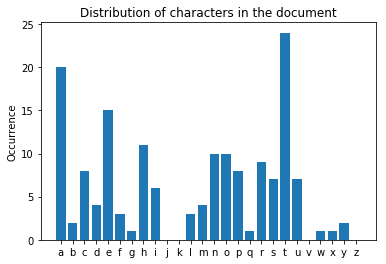

In [25]:
import numpy as np
import matplotlib.pyplot as plt


def count_characters(input_file):
    char_occurrences = {chr(ord("a") + index): 0 for index in range(26)}
    with open(input_file, "r") as file:
        for line in file:
            for char in line:
                char = char.lower()
                if char in char_occurrences:
                    char_occurrences[char] += 1
    return char_occurrences

# If you want to be able to write the name, replace the line with "file_name=..." the "input(...)"
# input("Please enter the name of the file to analyse with the extension: ")
file_name = "ch02/document_to_analyse_2_34.txt" # must include relative path (ch02/)
occurrences = count_characters(file_name)

objects = occurrences.keys()
x_pos = np.arange(len(objects))
count = occurrences.values()

plt.bar(x_pos, count)
plt.xticks(x_pos, objects)
plt.ylabel("Occurrence")
plt.title("Distribution of characters in the document")
plt.show()


# document_to_analyse_2_34.txt contains this text:

#############################################################################
# This is a text document to analyse.                                       #
#                                                                           #
# Write a Python program that inputs a document and then outputs a barchart #
# plot of the frequencies of each alphabet character that appears in        #
# that document.                                                            #
#############################################################################